In [1]:
from aggregate import build
from aggregate import Distortion, make_mosaic_figure, Aggregate, Portfolio

time: 593 ms (started: 2022-10-17 11:41:02 +01:00)


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


In [2]:
build

,,program
kind,name,


time: 94 ms (started: 2022-10-17 11:37:28 +01:00)


In [3]:
sam1 = build('agg SAM dfreq [1 2 3] [1/2 1/4 1/4] dsev [1:4]')
sam2 = build('agg SAMEX dfreq [1 2 12] [1/2 1/4 1/4] dsev [1:10]')

time: 46 ms (started: 2022-10-17 11:20:21 +01:00)


In [4]:
sam1

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,2.500,2.500,0.000,447.214m,447.214m,0.000,0.000
Freq,1.750,,,473.804m,,,493.382m
Agg,4.375,4.375,-222.045a,582.044m,582.044m,-1.332f,656.479m


time: 16 ms (started: 2022-10-17 11:20:22 +01:00)


In [5]:
sam2.describe

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,5.500,5.500,0.000,522.233m,522.233m,0.000,0.000
Freq,4.000,,,1.159,,,1.128
Agg,22.000,22.000,-666.134a,1.188,1.188,-1.443f,1.212


time: 16 ms (started: 2022-10-17 11:20:23 +01:00)


In [6]:
sam1.pdf(4.4), sam1.pdf(4), sam1.pmf(4), sam1.pdf(4.5), sam1.pmf(4.5)

(0.14453124999999997, 0.18359375, 0.18359375, 0.134765625, 0.0)

time: 16 ms (started: 2022-10-17 11:20:26 +01:00)


In [18]:
sam1.cdf(4), sam1.cdf(4.5), sam1.cdf(5), sam1.sf(5)

(0.609375, 0.609375, 0.6953125, 0.3046875)

time: 4.25 ms


In [23]:
sam1.q(0.996), sam1.q(sam1.cdf(5)), sam1.cdf(11), sam1.cdf(12), sam1.q(1), sam1.q(0)

(11.0, 5.0, 0.99609375, 1.0, 12.0, 0.0)

time: 3.93 ms


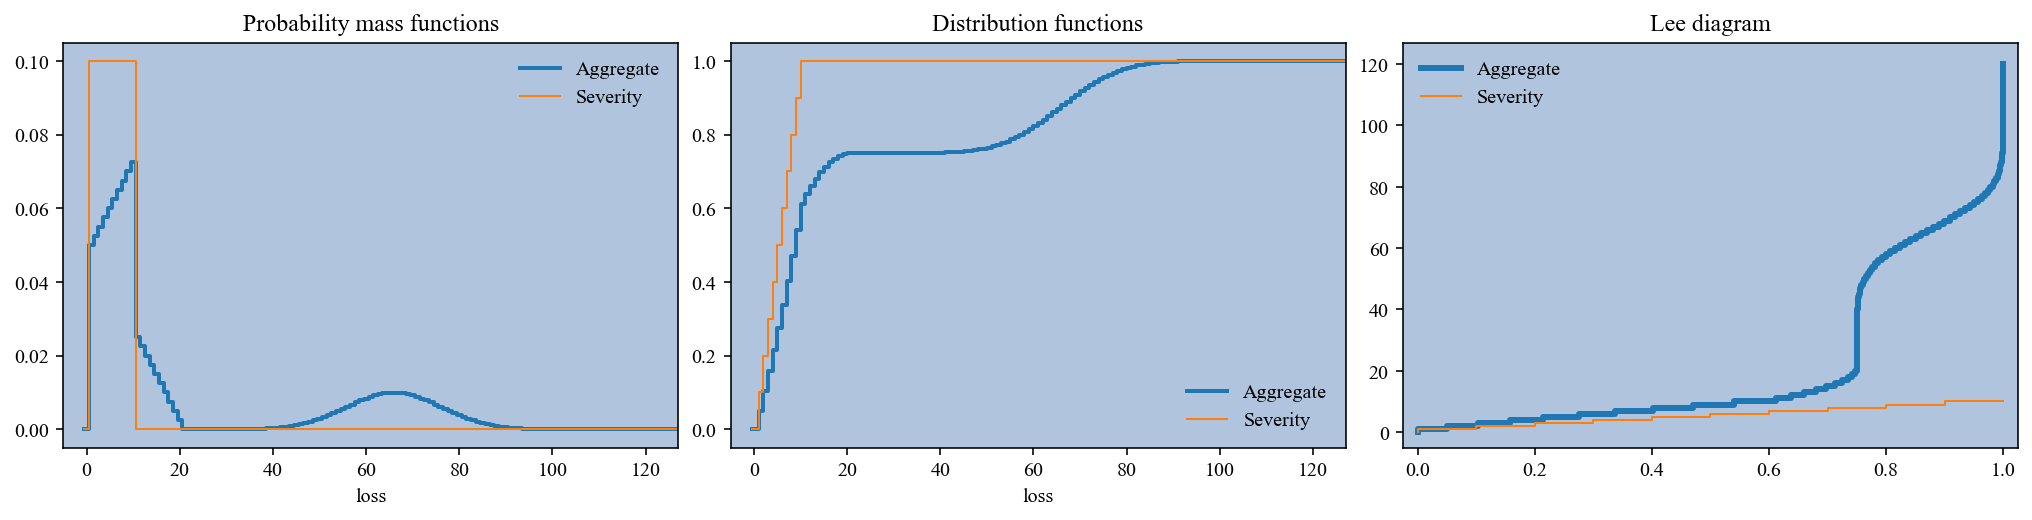

time: 590 ms


In [10]:
sam2.plot()

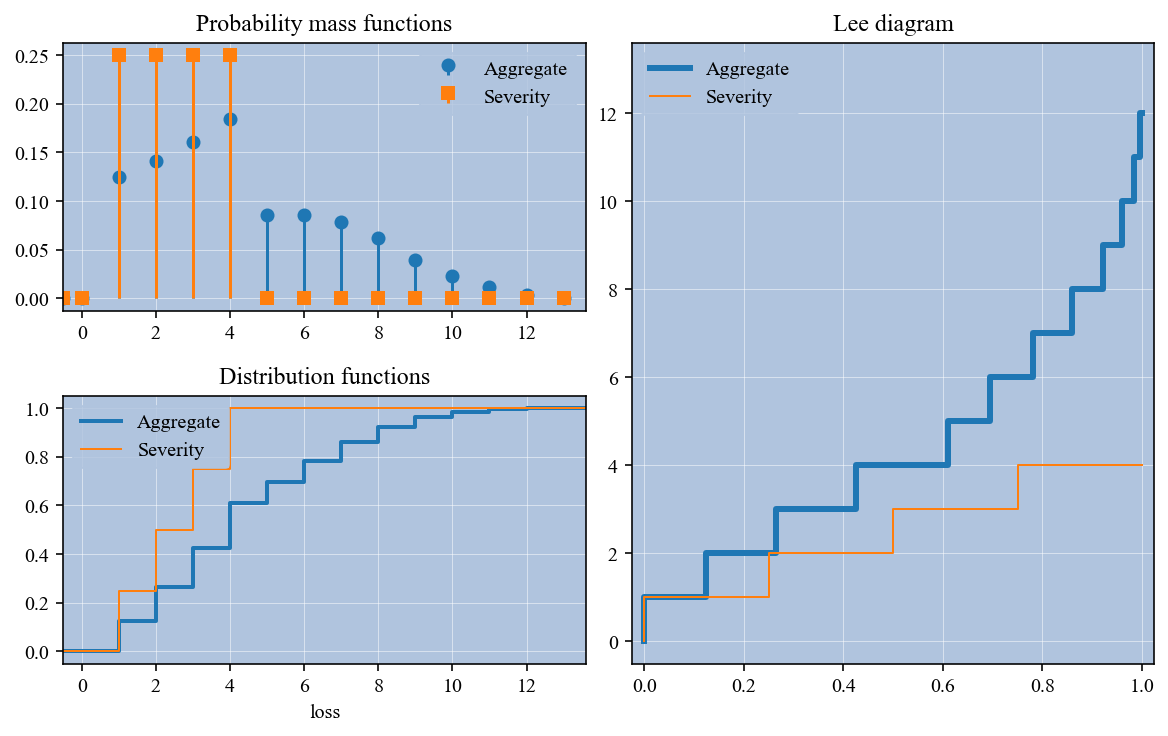

time: 392 ms


In [11]:
f, axd = make_mosaic_figure('AC\nBC', (8, 5))
sam1.plot(axd=axd)
for ax in axd.values():
    ax.grid(lw=.25, c='w')
# axd['A'].set(yscale='log')

In [32]:
sam1.statistics_df

,name,limit,attachment,sevcv_param,el,prem,lr,freq_1,freq_2,freq_3,...,sev_cv,sev_skew,agg_1,agg_2,agg_3,agg_m,agg_cv,agg_skew,mix_cv,wt
0,SAM,inf,0,0,4.375,0,0,1.750,3.750,9.250,...,447.214m,0.000,4.375,25.625,179.688,4.375,582.044m,656.479m,"[1.0, 2.0, 3.0]",1.000


time: 39.2 ms


In [13]:
pd.concat((sam1.statistics, sam2.statistics), axis=1)

name                            SAM             SAMEX
component  measure                                   
limit                           inf               inf
attachment                        0                 0
sevcv      param                  0                 0
el                            4.375            22.000
prem                              0                 0
lr                                0                 0
freq       ex1                1.750             4.000
           ex2                3.750            37.500
           ex3                9.250           434.500
           mean               1.750             4.000
           cv              473.804m             1.159
           skew            493.382m             1.128
sev        ex1                2.500             5.500
           ex2                7.500            38.500
           ex3               25.000           302.500
           mean               2.500             5.500
           cv              447.214m          522.233m
           skew               0.000             0.000
agg        ex1                4.375            22.000
           ex2               25.625            1.167k
           ex3              179.688           77.395k
           mean               4.375            22.000
           cv              582.044m             1.188
           skew            656.479m             1.212
mix        cv       [1.0, 2.0, 3.0]  [1.0, 2.0, 12.0]
wt                            1.000             1.000

time: 21 ms


In [15]:
sam2.report_df

view,0,independent,mixed,empirical,error
statistic,,,,,
name,SAMEX,SAMEX,SAMEX,,
limit,inf,inf,inf,,
attachment,0,0.000,0.000,,
el,22.000,22.000,22.000,,
freq_m,4.000,4.000,4.000,,
freq_cv,1.159,1.159,1.159,,
freq_skew,1.128,1.128,1.128,,
sev_m,5.500,5.500,5.500,5.500,0.000
sev_cv,522.233m,522.233m,522.233m,522.233m,0.000


time: 19.1 ms


In [17]:
ps = [.95, .99, .996, .999, 1]
print([sam2.q(p) for p in ps])
pd.concat((sam2.price(p, Distortion('dual', 1.75)) for p in ps), keys=ps, names=['p', 'line'])

[74.0, 83.0, 87.0, 92.0, 120.0]


,statistic,L,P,M,Q,a,LR,PQ,ROE
p,line,,,,,,,,
950.000m,SAMEX,21.703,31.420,9.717,42.580,74.000,690.727m,737.903m,228.214m
990.000m,SAMEX,21.958,31.861,9.903,51.139,83.000,689.178m,623.014m,193.646m
996.000m,SAMEX,21.986,31.910,9.924,55.090,87.000,688.997m,579.242m,180.146m
999.000m,SAMEX,21.997,31.930,9.933,60.070,92.000,688.925m,531.546m,165.351m
1.000,SAMEX,22.000,31.935,9.935,88.065,120.000,688.908m,362.624m,112.809m


time: 35.4 ms


In [9]:
sam1.density_df.query('p>0')

,loss,p,p_total,p_sev,log_p,log_p_sev,F,F_sev,S,S_sev,lev,exa,exlea,e,epd,exgta,exeqa,gS,exag
loss,,,,,,,,,,,,,,,,,,,
1.000,1.000,166.667m,166.667m,333.333m,-1.792,-1.099,166.667m,333.333m,833.333m,666.667m,1.000,1.000,1000.000m,4.083,755.102m,4.700,1.000,931.959m,1.000
2.000,2.000,194.444m,194.444m,333.333m,-1.638,-1.099,361.111m,666.667m,638.889m,333.333m,1.833,1.833,1.538,4.083,551.020m,5.522,2.000,782.999m,1.932
3.000,3.000,64.815m,64.815m,0.000,-2.736,inf,425.926m,666.667m,574.074m,333.333m,2.472,2.472,1.761,4.083,394.558m,5.806,3.000,722.028m,2.715
4.000,4.000,222.222m,222.222m,333.333m,-1.504,-1.099,648.148m,1.000,351.852m,0.000,3.046,3.046,2.529,4.083,253.968m,6.947,4.000,478.191m,3.437
5.000,5.000,83.333m,83.333m,0.000,-2.485,inf,731.481m,1.000,268.519m,0.000,3.398,3.398,2.810,4.083,167.800m,7.552,5.000,374.388m,3.915
6.000,6.000,92.593m,92.593m,0.000,-2.380,inf,824.074m,1.000,175.926m,0.000,3.667,3.667,3.169,4.083,102.041m,8.368,6.000,251.918m,4.290
7.000,7.000,55.556m,55.556m,0.000,-2.890,inf,879.630m,1.000,120.370m,0.000,3.843,3.843,3.411,4.083,58.957m,9.000,7.000,175.008m,4.541
8.000,8.000,55.556m,55.556m,0.000,-2.890,inf,935.185m,1.000,64.815m,0.000,3.963,3.963,3.683,4.083,29.478m,9.857,8.000,95.629m,4.716
9.000,9.000,27.778m,27.778m,0.000,-3.584,inf,962.963m,1.000,37.037m,0.000,4.028,4.028,3.837,4.083,13.605m,10.500,9.000,55.038m,4.812


time: 40.7 ms


In [10]:
sam1.pdf(3), sam1.cdf(3), sam1.sf(3), sam1.cdf(5), sam1.cdf(5.5), sam1.cdf(6)

(0.0648148148148148,
 array(   0.42593),
 0.5740740740740741,
 array(   0.73148),
 array(   0.73148),
 array(   0.82407))

time: 3.02 ms


In [11]:
sam1.density_df

,loss,p,p_total,p_sev,log_p,log_p_sev,F,F_sev,S,S_sev,lev,exa,exlea,e,epd,exgta,exeqa,gS,exag
loss,,,,,,,,,,,,,,,,,,,
0.000,0.000,0.000,0.000,0.000,inf,inf,0.000,0.000,1.000,1.000,0.000,0.000,0.000,4.083,1.000,4.083,0.000,1.000,0.000
1.000,1.000,166.667m,166.667m,333.333m,-1.792,-1.099,166.667m,333.333m,833.333m,666.667m,1.000,1.000,1000.000m,4.083,755.102m,4.700,1.000,931.959m,1.000
2.000,2.000,194.444m,194.444m,333.333m,-1.638,-1.099,361.111m,666.667m,638.889m,333.333m,1.833,1.833,1.538,4.083,551.020m,5.522,2.000,782.999m,1.932
3.000,3.000,64.815m,64.815m,0.000,-2.736,inf,425.926m,666.667m,574.074m,333.333m,2.472,2.472,1.761,4.083,394.558m,5.806,3.000,722.028m,2.715
4.000,4.000,222.222m,222.222m,333.333m,-1.504,-1.099,648.148m,1.000,351.852m,0.000,3.046,3.046,2.529,4.083,253.968m,6.947,4.000,478.191m,3.437
5.000,5.000,83.333m,83.333m,0.000,-2.485,inf,731.481m,1.000,268.519m,0.000,3.398,3.398,2.810,4.083,167.800m,7.552,5.000,374.388m,3.915
6.000,6.000,92.593m,92.593m,0.000,-2.380,inf,824.074m,1.000,175.926m,0.000,3.667,3.667,3.169,4.083,102.041m,8.368,6.000,251.918m,4.290
7.000,7.000,55.556m,55.556m,0.000,-2.890,inf,879.630m,1.000,120.370m,0.000,3.843,3.843,3.411,4.083,58.957m,9.000,7.000,175.008m,4.541
8.000,8.000,55.556m,55.556m,0.000,-2.890,inf,935.185m,1.000,64.815m,0.000,3.963,3.963,3.683,4.083,29.478m,9.857,8.000,95.629m,4.716


time: 122 ms


In [12]:
sam1.q(sam1.cdf(5.5))

5.0

time: 4 ms


In [14]:
sam2 = build('agg B dfreq [1 2 3] dsev [2 4 8]')

time: 21.8 ms


In [15]:
p = Portfolio('samp', [sam1, sam2])

time: 6 ms


In [16]:
p

<aggregate.port.Portfolio object at 0x00000274E372EBB0>, { 'name': 'samp', 'spec': [{'name': 'SAM', 'note': '', 'occ_reins': None, 'occ_kind': '', 'agg_reins': None, 'agg_kind': ''}, {'name': 'B', 'note': '', 'occ_reins': None, 'occ_kind': '', 'agg_reins': None, 'agg_kind': ''}]}

time: 16.1 ms


In [22]:
p.update(bs=1,log2=9)

44:27.567|2223|WARNING   | aggregate.port, add_exa|  Portfolio.add_exa | p_total has a negative value starting at           loss     p_SAM       p_B   p_total    ημ_SAM      ημ_B
2.000    2.000  194.444m  111.111m -379.471z  111.111m  194.444m
35.000  35.000   56.585z     0.000   -1.580a  732.561z    1.528a
37.000  37.000  774.210z     0.000   -1.684a  177.525z -875.917z
38.000  38.000  753.097z   -3.347a   -1.961a -423.879z    2.215a
40.000  40.000 -482.749z    1.788a -196.846z -373.426z   -2.098a; NOT setting to zero...


time: 167 ms


In [ ]:
p.audit_df

In [17]:
s = sam1

time: 1.63 ms


In [18]:
p.describe()

E(X) Est E(X)  Err E(X)     CV(X) Est CV(X) Err CV(X)   Skew(X)
line  X                                                                      
SAM   Sev    2.333    2.333  222.045a  534.522m  534.522m -777.156a  381.802m
      Freq   1.750                     473.804m                      493.382m
      Agg    4.083    4.083  222.045a  622.700m  622.700m     0.000  751.577m
B     Sev    4.667    4.667  222.045a  534.522m  534.522m   -1.221f  381.802m
      Freq   2.000                     408.248m                        6.527f
      Agg    9.333    9.333  666.134a  556.349m  556.349m    2.665f  499.444m
total Sev    3.578                     649.477m                      910.655m
      Freq   3.750                     310.316m                      178.478m
      Agg   13.417                     430.935m                      425.726m

time: 20.5 ms


In [19]:
s.describe()

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,2.333,2.333,222.045a,534.522m,534.522m,-777.156a,381.802m
Freq,1.750,,,473.804m,,,493.382m
Agg,4.083,4.083,222.045a,622.700m,622.700m,0.000,751.577m


time: 13.3 ms


In [28]:
p.statistics

SAM         B     total
component measure                              
freq      ex1         1.750     2.000     3.750
          ex2         3.750     4.667    15.417
          ex3         9.250    12.000    68.250
          mean        1.750     2.000     3.750
          cv       473.804m  408.248m  310.316m
          skew     493.382m    6.527f  178.478m
sev       ex1         2.333     4.667     3.578
          ex2         7.000    28.000    18.200
          ex3        24.333   194.667   115.178
          mean        2.333     4.667     3.578
          cv       534.522m  534.522m  649.477m
          skew     381.802m  381.802m  910.655m
agg       ex1         4.083     9.333    13.417
          ex2        23.139   114.074   213.435
          ex3       159.639    1.638k    3.843k
          mean        4.083     9.333    13.417
          cv       622.700m  556.349m  430.935m
          skew     751.577m  499.444m  425.726m
          limit         inf       inf       inf
          P99.9e     14.970    29.388    35.053

time: 15.6 ms


In [44]:
s.statistics

,0
name,SAM
limit,inf
attachment,0
sevcv_param,0
el,4.083
prem,0
lr,0
freq_1,1.750
freq_2,3.750
freq_3,9.250


time: 11.4 ms


In [59]:
df.rename(index={'1': 'ex1', '2': 'ex2', '3': 'ex3', 'm': 'mean', np.nan: ''})

name                            SAM
component  measure                 
limit                           inf
attachment                        0
sevcv      param                  0
el                            4.083
prem                              0
lr                                0
freq       ex1                1.750
           ex2                3.750
           ex3                9.250
           mean               1.750
           cv              473.804m
           skew            493.382m
sev        ex1                2.333
           ex2                7.000
           ex3               24.333
           mean               2.333
           cv              534.522m
           skew            381.802m
agg        ex1                4.083
           ex2               23.139
           ex3              159.639
           mean               4.083
           cv              622.700m
           skew            751.577m
mix        cv       [1.0, 2.0, 3.0]
wt                            1.000

time: 13.3 ms


In [57]:
df = s.statistics#_total_df.iloc[0,0]
df

name                            SAM
component  measure                 
limit      NaN                  inf
attachment NaN                    0
sevcv      param                  0
el         NaN                4.083
prem       NaN                    0
lr         NaN                    0
freq       1                  1.750
           2                  3.750
           3                  9.250
           m                  1.750
           cv              473.804m
           skew            493.382m
sev        1                  2.333
           2                  7.000
           3                 24.333
           m                  2.333
           cv              534.522m
           skew            381.802m
agg        1                  4.083
           2                 23.139
           3                159.639
           m                  4.083
           cv              622.700m
           skew            751.577m
mix        cv       [1.0, 2.0, 3.0]
wt         NaN                1.000

time: 14.1 ms


In [46]:
t = s.statistics
t.columns = [t.iloc[0,0]]
t = t.iloc[1:]

t.index = t.index.str.split("_", expand=True, )

t.rename(index={'1': 'ex1', '2': 'ex2', '3': 'ex3', 'm': 'mean', np.nan: ''})
t.index.names =['component', 'measure']
t.columns.name = 'name'
t

In [ ]:
p.update(9, 1, remove_fuzz=True)

In [ ]:
sam1.plot()

In [ ]:
p.plot()

In [ ]:
p.n

In [ ]:
sam1

In [ ]:
sam1.audit.T

In [ ]:
p.audit_df

In [ ]:
sam1.audit_df

In [ ]:
sam1.describe()

In [ ]:
sam1.statistics

In [ ]:
p.statistics

In [ ]:
p.describe()

In [ ]:
a1 = build('agg A1 30 claims sev lognorm 20 cv [.25 .5 .75] wts=3 mixed gamma .3')

In [ ]:
a1.describe()

In [ ]:
ans = {}
for x in dir(p):
    if x[0] != '_':
        ob = getattr(p, x)
        # print(x, type(ob), isinstance(ob, pd.DataFrame))
        ans[x] = (type(ob), str(type(ob)))

In [ ]:
p

In [ ]:
p.report_df

pd.DataFrame(ans.values(), index=ans.keys(), columns=['x', 'sx']).sort_values('sx')

In [ ]:
self = a1

In [ ]:
pd.concat((self.statistics_df, self.statistics_total_df)).T

In [ ]:
a1.statistics

In [ ]:
a1.statistics_total_df

In [ ]:
a1.ex, a1.agg_m

In [ ]:
p.statistics_df

In [ ]:
p.statistics 

In [ ]:
a1._report_df

In [ ]:
a1.report_df

In [ ]:
a1.describe()

In [ ]:
p.audit_df.T

In [ ]:
a1.density_df.head().T

In [ ]:
p.statistics

In [ ]:
self=p

In [ ]:
self.statistics_df

In [ ]:
self.describe()

In [ ]:
df.fillna('')

In [ ]:
        if self.audit_df is not None:
            esev_m = -9 # self.audit_df.loc['total', 'emp_sev_1']
            esev_cv = -9 # self.audit_df.loc['total', 'emp_sev_cv']
            ea_m = self.audit_df.loc['total', 'EmpEX1']
            ea_cv = self.audit_df.loc['total', 'EmpCV']
            df.loc['Sev', 'Est E(X)'] = esev_m
            df.loc['Agg', 'Est E(X)'] = ea_m
            df.loc[:, 'Err E(X)'] = df['Est E(X)'] / df['E(X)'] - 1
            df.loc['Sev', 'Est CV(X)'] = esev_cv
            df.loc['Agg', 'Est CV(X)'] = ea_cv
            df.loc[:, 'Err CV(X)'] = df['Est CV(X)'] / df['CV(X)'] - 1
            df = df[['E(X)', 'Est E(X)', 'Err E(X)', 'CV(X)', 'Est CV(X)', 'Err CV(X)', 'Skew(X)']]
        df = df.fillna('')
        df

In [ ]:

        df

In [11]:
from aggregate import build

time: 0 ns (started: 2022-10-17 11:40:52 +01:00)


In [7]:
g1 = build('agg ONE 1 claim sev 100 @ weibull_min 1.5 fixed')

time: 141 ms (started: 2022-10-17 11:42:38 +01:00)


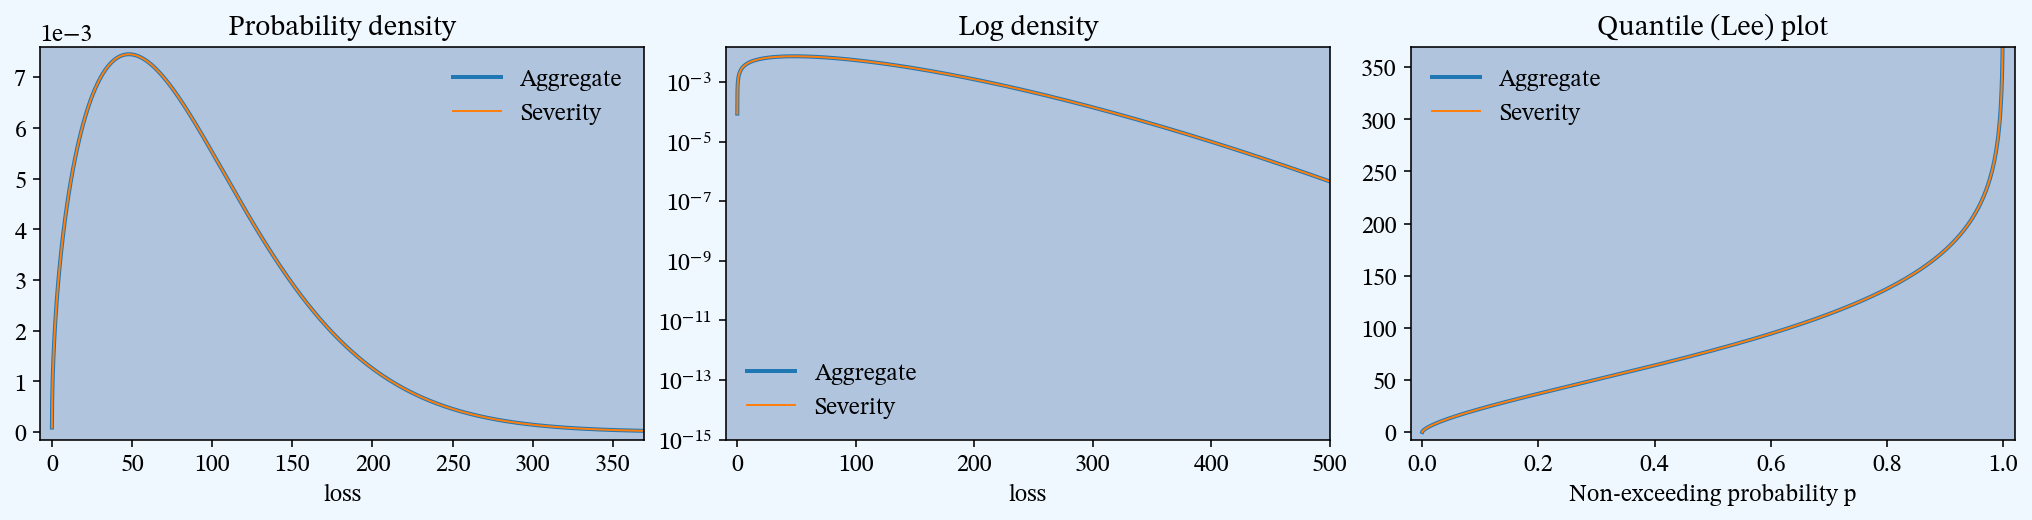

time: 672 ms (started: 2022-10-17 11:42:39 +01:00)


In [8]:
g1.plot()

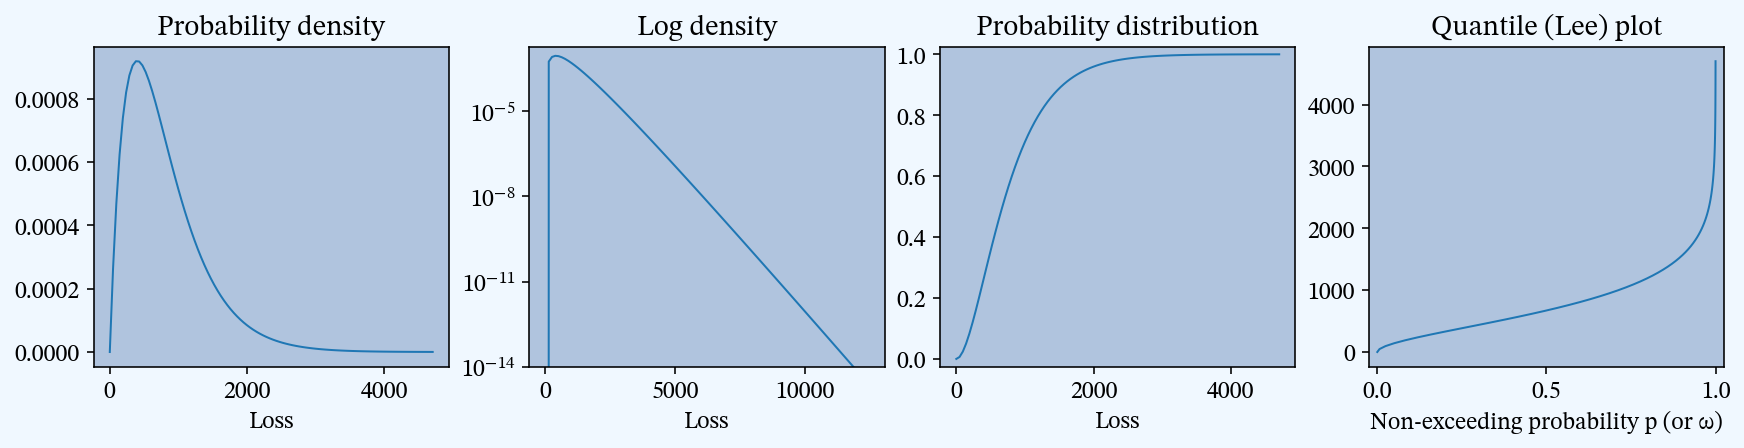

time: 500 ms (started: 2022-10-17 11:38:26 +01:00)


In [8]:
s1.plot()

In [4]:
s1 = build('sev S 400 @ gamma 2')

time: 0 ns (started: 2022-10-17 11:37:32 +01:00)


In [15]:
g1.bs

0.125

time: 15 ms (started: 2022-10-17 11:27:53 +01:00)


In [17]:
400 / 1e6 * 8

0.0032

time: 0 ns (started: 2022-10-17 11:28:13 +01:00)


In [20]:
par = build('agg P1 1 claim sev 2000 @ pareto 3 # -2000 fixed') #, log2=16, bs=.25)

46:31.630|2933|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=inf, message no message ->
46:31.631|2938|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting pareto EX^3 integral for convergence reasons
46:32.088|2944|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | [ϵ, 0.01] split EX^3 integral returned The maximum number of subdivisions (100) has been achieved.   If increasing the limit yields no improvement it is advised to analyze    the integrand in order to determine the difficulties.  If the position of a    local difficulty can be determined (singularity, discontinuity) one will    probably gain from splitting up the interval and calling the integrator    on the subranges.  Perhaps a special-purpose integrator should be used.


time: 797 ms (started: 2022-10-17 11:46:31 +01:00)


In [21]:
par

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,1.000k,993.798,-6.202m,1.732,1.585,-85.181m,46.439
Freq,1.000,,,0.000,,,
Agg,1.000k,993.798,-6.202m,1.732,1.585,-85.181m,46.439


time: 0 ns (started: 2022-10-17 11:46:33 +01:00)


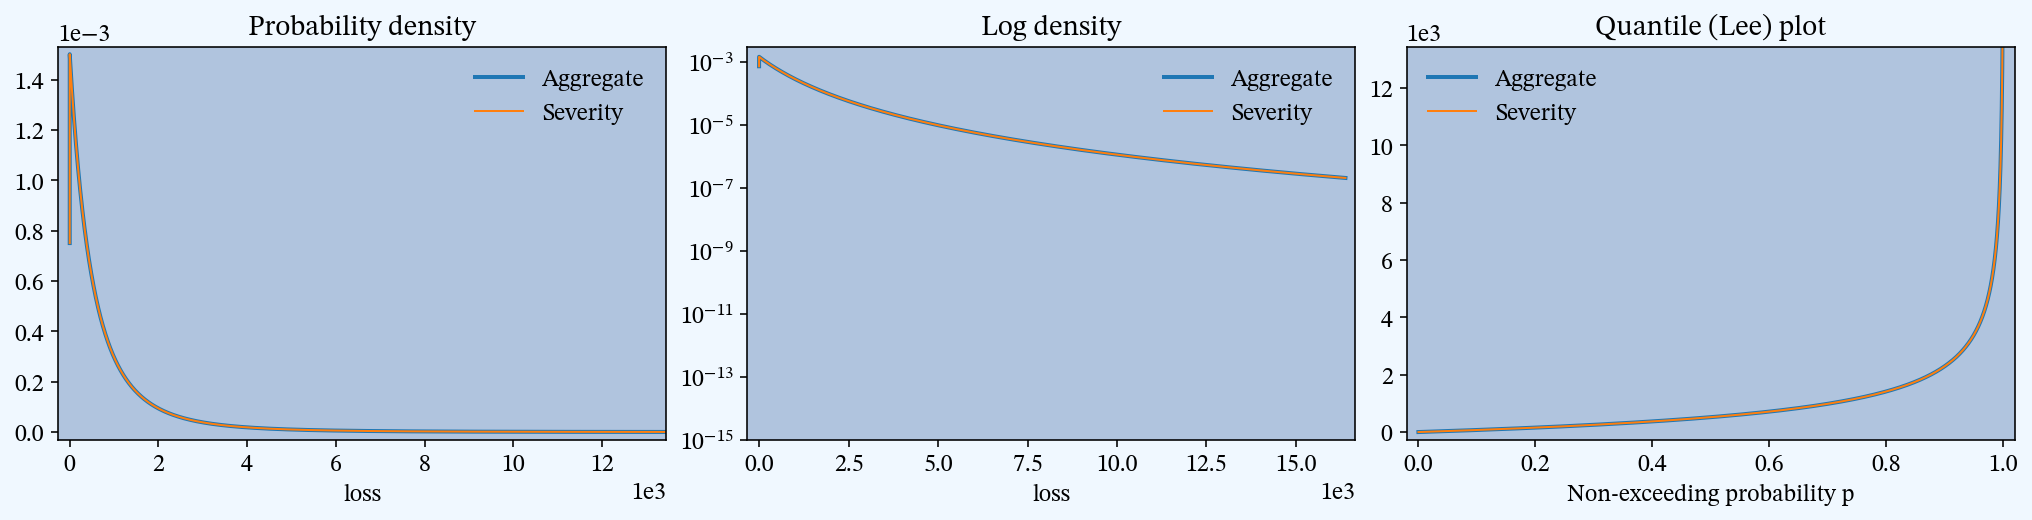

time: 1.16 s (started: 2022-10-17 11:46:25 +01:00)


In [19]:
par.plot()

In [4]:
from aggregate import build
import aggregate as agg

time: 0 ns (started: 2022-10-17 12:51:58 +01:00)


In [29]:
uw = agg.Underwriter()

time: 0 ns (started: 2022-10-17 12:12:53 +01:00)


In [ ]:
ex_3_3_5.update_work(

In [5]:
ex_3_3_5 = build('agg AEQ 1 claim sev [200 200] @ [expon pareto] [1 3] wts [.25 .75]  # [0 -200] fixed',
             normalize=False)
    # , discretization_calc='both', log2=16)
                 # sev_calc='continuous')
                 # log2=16, bs=1/64) # , sev_calc='continuous')
self = ex_3_3_5
1/ex_3_3_5.bs

52:08.389|2995|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=inf, message no message ->
52:08.389|3000|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting pareto EX^3 integral for convergence reasons
52:08.824|3006|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | [ϵ, 0.01] split EX^3 integral returned The maximum number of subdivisions (100) has been achieved.   If increasing the limit yields no improvement it is advised to analyze    the integrand in order to determine the difficulties.  If the position of a    local difficulty can be determined (singularity, discontinuity) one will    probably gain from splitting up the interval and calling the integrator    on the subranges.  Perhaps a special-purpose integrator should be used.


2.0

time: 891 ms (started: 2022-10-17 23:52:07 +01:00)


In [6]:
ex_3_3_5

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,125.000,124.527,-3.782m,1.483,1.402,-54.553m,29.127
Freq,1.000,,,0.000,,,
Agg,125.000,124.527,-3.782m,1.483,1.402,-54.553m,29.127


time: 16 ms (started: 2022-10-17 23:52:09 +01:00)


In [10]:
f, f2 = ex_3_3_5.sev_cdf(100, True)
f, .25*(1-np.exp(-(100/(100 + 100)))) + .75*(1 - (200/(100+200))**3), ex_3_3_5.cdf(100), ex_3_3_5.sev_cdf(100+ex_3_3_5.bs/2)

(0.6261451128496194,
 0.6261451128496194,
 0.6268891661811365,
 0.6268891661811365)

time: 0 ns (started: 2022-10-17 23:53:34 +01:00)


In [1]:
from aggregate import build
import aggregate as agg

time: 641 ms (started: 2022-10-17 13:41:11 +01:00)


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


In [22]:
build('agg AEQ2 1 claim inf xs 200 sev lognorm 200 cv .3  fixed') #, bs=1/16)

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,52.844,52.840,-83.830u,893.104m,892.731m,-417.686u,1.648
Freq,1.000,,,0.000,,,
Agg,52.844,52.840,-83.830u,893.104m,892.731m,-417.686u,1.648


time: 109 ms (started: 2022-10-17 13:59:36 +01:00)


In [23]:
ex_3_4_1 = build('agg AEQ2 1 claim inf xs 100 sev 1000 @ expon 1 ! fixed') # , bs=1/16)
# ex_3_4_1 = build('agg AEQ2 1 claim sev 1000 @ expon 1 occurrence net of 100 x 0 fixed', log2=16)
self = ex_3_4_1

time: 141 ms (started: 2022-10-17 14:00:07 +01:00)


In [25]:
self

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,904.837,902.760,-2.296m,1.100,1.093,-6.446m,2.026
Freq,1.000,,,0.000,,,
Agg,904.837,902.760,-2.296m,1.100,1.093,-6.446m,2.026


time: 15 ms (started: 2022-10-17 14:00:11 +01:00)


In [29]:
1000 * np.exp(-0.1) , (1000 * np.exp(-0.1) * 1.1)**2

(904.8374180359596, 990664.2112243581)

time: 16 ms (started: 2022-10-17 14:01:13 +01:00)


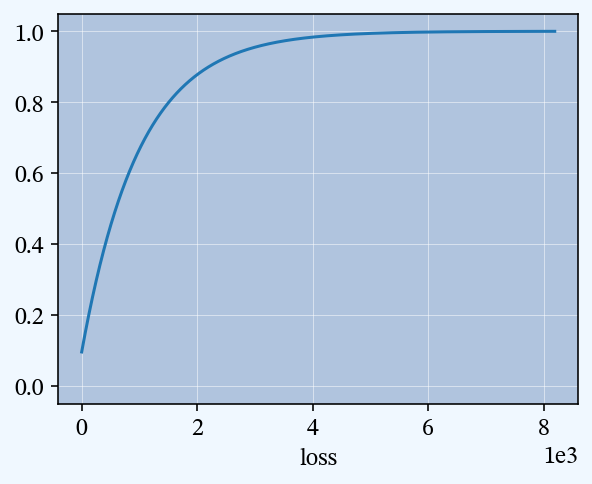

time: 141 ms (started: 2022-10-17 14:02:07 +01:00)


In [31]:
%%sf 1 1 
self.density_df.F.plot(ax=ax)
ax.set(ylim=[-0.05, 1.05])
ax.grid(lw=.25, c='w')

In [32]:
ex_3_4_2 = build('agg AEQ2 1 claim sev 10 @ beta 2 1 occurrence net of 4 x 0 fixed')
self = ex_3_4_2
self

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,6.667,2.880,-568.000m,353.553m,689.706m,950.783m,-565.685m
Freq,1.000,,,0.000,,,
Agg,6.667,2.880,-568.000m,353.553m,689.706m,950.783m,-565.685m


time: 78 ms (started: 2022-10-17 14:03:10 +01:00)


In [33]:
ex_3_4_2 = build('agg AEQ2 1 claim 6 x 4 sev 10 @ beta 2 1 fixed')
self = ex_3_4_2
self

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.429,3.429,6.623n,489.473m,489.473m,102.796n,-293.128m
Freq,1.000,,,0.000,,,
Agg,3.429,3.429,6.623n,489.473m,489.473m,102.796n,-293.128m


time: 32 ms (started: 2022-10-17 14:04:03 +01:00)


In [34]:
ex_3_4_2 = build('agg AEQ2 1 claim 6 x 4 sev 10 @ beta 2 1 ! fixed')
self = ex_3_4_2
self

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,2.880,2.880,6.623n,689.706m,689.706m,61.635n,-121.706m
Freq,1.000,,,0.000,,,
Agg,2.880,2.880,6.623n,689.706m,689.706m,61.635n,-121.706m


time: 47 ms (started: 2022-10-17 14:04:17 +01:00)


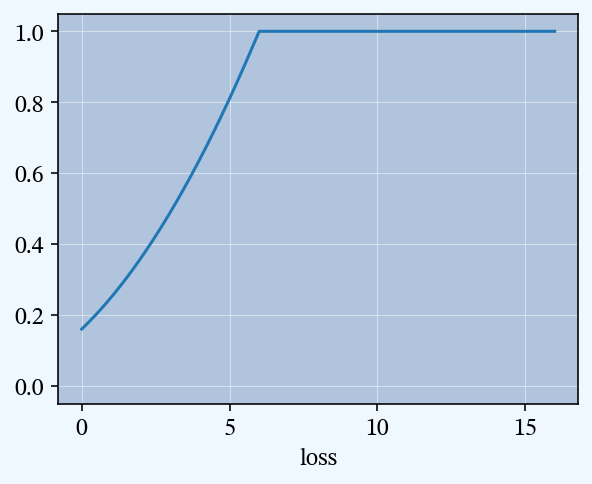

time: 125 ms (started: 2022-10-17 14:04:48 +01:00)


In [36]:
%%sf 1 1 
self.density_df.F.plot(ax=ax)
ax.set(ylim=[-0.05, 1.05])
ax.grid(lw=.25, c='w')

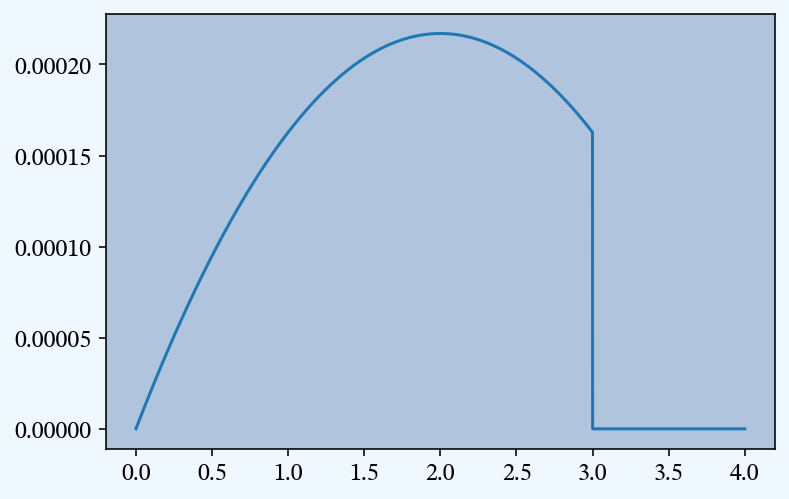

time: 141 ms (started: 2022-10-17 16:45:27 +01:00)


In [46]:
xs = np.linspace(0, 4, 2**13, endpoint=False)
F = np.where(xs<3,(xs * xs  * (2 - xs / 3)) / 9, 1)
ps = np.diff(F, append=1)
plt.plot(xs, ps)

In [45]:
from aggregate import Aggregate

time: 0 ns (started: 2022-10-17 16:44:42 +01:00)


In [48]:
ex_3_4_4 = Aggregate('Example', exp_en=1, sev_name='dhistogram', sev_xs=xs, sev_ps=ps, 
                 exp_attachment=0, exp_limit=1, freq_name='fixed')
self = ex_3_4_4
self

46:35.878|2934|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=0.12048123447987558, message no message ->
46:36.334|2934|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=0.08898468274530193, message no message ->
46:36.792|2934|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=0.07045935079934817, message no message ->


,E(X),CV(X),Skew(X)
X,,,
Sev,935.133m,182.616m,-2.902
Freq,1.000,0.000,
Agg,935.133m,182.616m,-2.902


time: 1.39 s (started: 2022-10-17 16:46:35 +01:00)


In [52]:
ex3_4_5_06 = build('agg X06 1 claim 500 x 100 sev 1000 @ expon fixed')
ex3_4_5_07 = build('agg X07 1 claim 500 x 100 sev 1050 @ expon fixed')
ans = pd.concat((ex3_4_5_06.describe, ex3_4_5_07.describe), keys=['2006', '2007'])
display(ans)
ans.iloc[3, 0] / ans.iloc[0, 0] - 1

E(X) Est E(X)  Err E(X)     CV(X) Est CV(X) Err CV(X) Skew(X)
     X                                                                     
2006 Sev   393.469  393.469 -651.042p  406.559m  406.559m   22.316n  -1.172
     Freq    1.000                        0.000                            
     Agg   393.469  393.469 -651.042p  406.559m  406.559m   22.316n  -1.172
2007 Sev   397.798  397.798 -590.514p  396.913m  396.913m   21.957n  -1.234
     Freq    1.000                        0.000                            
     Agg   397.798  397.798 -590.514p  396.913m  396.913m   21.957n  -1.234

0.011000207063778022

time: 78 ms (started: 2022-10-17 16:52:31 +01:00)


In [75]:
build('agg Copart 1 claim sev 3600 @ pareto 5 # (-3600) fixed')

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,900.000,896.113,-4.319m,1.291,1.254,-28.659m,4.648
Freq,1.000,,,0.000,,,
Agg,900.000,896.113,-4.319m,1.291,1.254,-28.659m,4.648


time: 140 ms (started: 2022-10-17 17:12:46 +01:00)


In [79]:
build('agg Copart 1 claim 5000 xs 0 sev 3600 @ pareto 5 # (-3600) occurrence net of 0.15 so 5000 xs 0 fixed', log2=16)

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,872.365,741.520,-149.989m,1.126,1.126,-13.086u,2.095
Freq,1.000,,,0.000,,,
Agg,872.365,741.520,-149.989m,1.126,1.126,-13.086u,2.095


time: 125 ms (started: 2022-10-17 17:14:38 +01:00)


In [80]:
# their cv
987.6108 / 741.5103

1.3318908719137146

time: 0 ns (started: 2022-10-17 17:15:58 +01:00)


In [1]:
from aggregate import build

time: 609 ms (started: 2022-10-17 17:35:06 +01:00)


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


In [10]:
ob = build('agg Copart 1 claim sev 3600 @ pareto 5 # (-3600) occurrence net of 0.15 so 1e7 xs 0 fixed', log2=18, bs=1/4)
ob

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,900.000,764.992,-150.009m,1.291,1.290,-1.012m,4.648
Freq,1.000,,,0.000,,,
Agg,900.000,764.992,-150.009m,1.291,1.290,-1.012m,4.648


time: 343 ms (started: 2022-10-17 17:36:59 +01:00)


In [72]:
ex3_4_4 = build('agg Copart 1 claim sev 3600 @ pareto 5 # (-3600) occurrence net of 0.15 so 5000 xs 0 and inf xs 5000 fixed')
self = ex3_4_4

time: 141 ms (started: 2022-10-17 17:09:40 +01:00)


In [73]:
self

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,900.000,765.524,-149.418m,1.291,1.284,-5.689m,4.648
Freq,1.000,,,0.000,,,
Agg,900.000,765.524,-149.418m,1.291,1.284,-5.689m,4.648


time: 16 ms (started: 2022-10-17 17:09:41 +01:00)


In [74]:
741.5103 * .85

630.283755

time: 0 ns (started: 2022-10-17 17:10:02 +01:00)


1.3318908719137146

time: 0 ns (started: 2022-10-17 17:06:34 +01:00)


<AxesSubplot:xlabel='loss'>

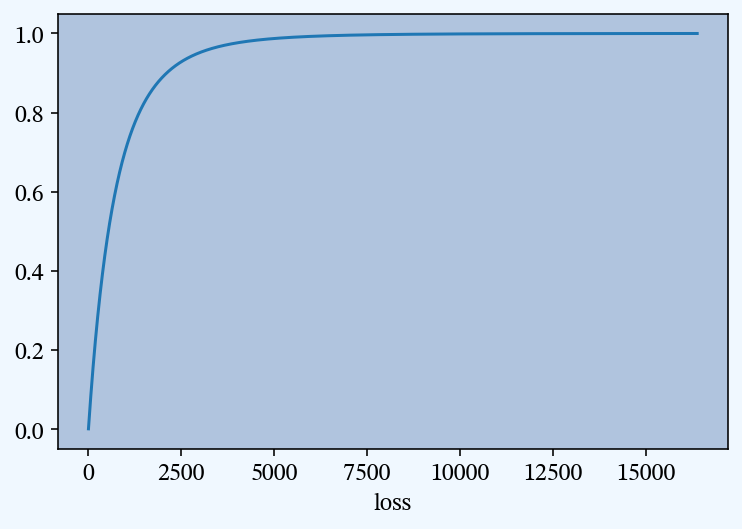

time: 141 ms (started: 2022-10-17 17:07:14 +01:00)


In [67]:
self.density_df.F.plot()

# Agg Loss Models, Ch 5

In [5]:
ex_5_3_1 = build('agg QU 12 claims dsev [1 2 3] [1/2 1/3 1/6] poisson')
ex_5_3_1

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,1.667,1.667,-111.022a,447.214m,447.214m,-333.067a,626.099m
Freq,12.000,,,288.675m,,,288.675m
Agg,20.000,20.000,3.997f,316.228m,316.228m,1.075p,363.662m


time: 31 ms (started: 2022-10-17 17:44:53 +01:00)


In [6]:
ex_5_3_1.agg_m, ex_5_3_1.agg_var

(20.0, 40.000000000000064)

time: 16 ms (started: 2022-10-17 17:45:08 +01:00)


In [1]:
from aggregate import build

time: 625 ms (started: 2022-10-17 17:43:51 +01:00)


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


In [2]:
ex_5_3_2 = build('agg QU2 dfreq [1 2] [.8 .2] dsev [0 100 1000] [.2 .7 .1]')
ex_5_3_2

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,170.000,170.000,-666.134a,1.644,1.644,222.045a,2.564
Freq,1.200,,,333.333m,,,1.500
Agg,204.000,204.000,-1.443f,1.537,1.537,-444.089a,2.399


time: 47 ms (started: 2022-10-17 17:43:52 +01:00)


In [4]:
ex_5_3_2.agg_m, ex_5_3_2.agg_sd, ex_5_3_2.agg_var 

(204.00000000000003, 313.5984693840198, 98343.99999999999)

time: 0 ns (started: 2022-10-17 17:44:19 +01:00)


In [20]:
ex_5_3_3 = build('agg QU3 4 claims dsev [1:4] geometric')  
ex_5_3_3

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,2.500,2.500,0.000,447.214m,447.214m,0.000,0.000
Freq,4.000,,,1.118,,,2.012
Agg,10.000,10.000,-4.751n,1.140,1.140,-40.469n,2.024


time: 32 ms (started: 2022-10-17 17:48:31 +01:00)


In [21]:
ex_5_3_3.cdf(3)

0.34559999999999996

time: 0 ns (started: 2022-10-17 17:48:34 +01:00)


In [26]:
ex_5_3_3.density_df.F[:20]

loss
0.000     200.000m
1.000     240.000m
2.000     288.000m
3.000     345.600m
4.000     414.720m
5.000     457.664m
6.000     501.197m
7.000     543.836m
8.000     583.483m
9.000     617.236m
10.000    649.150m
11.000    678.741m
12.000    705.722m
13.000    730.170m
14.000    752.757m
15.000    773.478m
16.000    792.425m
17.000    809.766m
18.000    825.685m
19.000    840.271m
20.000    853.630m
Name: F, dtype: float64

time: 0 ns (started: 2022-10-17 17:51:07 +01:00)


In [1]:
from aggregate import MomentAggregator
import scipy.stats as ss

time: 641 ms (started: 2022-10-18 13:23:26 +01:00)


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


In [5]:
mom.ex

80000.0

time: 0 ns (started: 2022-10-18 13:24:52 +01:00)


In [6]:
mom = MomentAggregator.agg_from_fs2(8, 9, 10000, 3937**2)
fz = ss.norm(loc=mom.ex, scale=mom.sd)
mom['prob'] = fz.sf(1.5*m)
mom

ex       80.000k
var       1.024G
sd       32.000k
cv      400.000m
prob    105.650m
dtype: float64

time: 0 ns (started: 2022-10-18 13:25:04 +01:00)


In [13]:
8 * 3937**2 + 10000**2 * 9

1023999752

time: 0 ns (started: 2022-10-18 13:21:36 +01:00)


In [27]:
ex_5_3_5 = build('agg Pharma 25 claims sev 90 @ uniform 1 # 5 poisson')

time: 31 ms (started: 2022-10-17 17:52:43 +01:00)


In [29]:
ex_5_3_5.sf(2000), ex_5_3_5.agg_m, ex_5_3_5.agg_var

(0.0069696983758628095, 1250.0, 79375.0)

time: 0 ns (started: 2022-10-17 17:56:21 +01:00)


In [31]:
import scipy.stats as ss

time: 0 ns (started: 2022-10-17 17:58:08 +01:00)


In [37]:
m, sd =  ex_5_3_5.agg_m, ex_5_3_5.agg_var**.5
fz = ss.norm(loc=m, scale=sd)

time: 0 ns (started: 2022-10-17 17:59:58 +01:00)


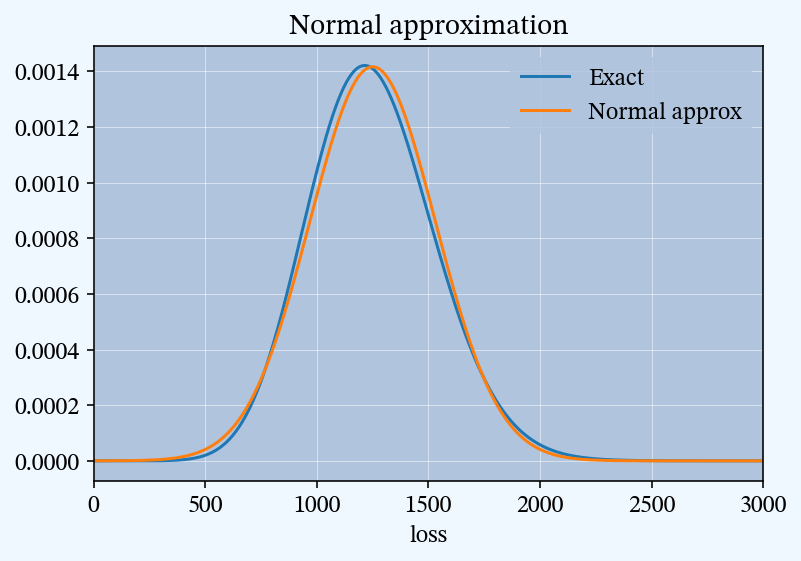

time: 157 ms (started: 2022-10-17 18:12:14 +01:00)


In [42]:
ax = (ex_5_3_5.density_df.p / ex_5_3_5.bs).plot(label='Exact')
ax.plot(ex_5_3_5.xs, fz.pdf(ex_5_3_5.xs), label='Normal approx')
ax.grid(lw=.25, c='w')
ax.set(xlim=[0, 3000], title='Normal approximation')
ax.legend(loc='upper right')

In [51]:
ex_5_3_6a = build('agg Projects 2 claims dsev [5 10 20] [.2 .3 .5] geometric')
ex_5_3_6a

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,14.000,14.000,0.000,446.071m,446.071m,0.000,-234.033m
Freq,2.000,,,1.225,,,2.041
Agg,28.000,28.000,-9.594u,1.265,1.265,-43.398u,2.073


time: 31 ms (started: 2022-10-17 22:12:55 +01:00)


In [45]:
# geometric, mean=beta, p=1/(1+beta), var=b(1+b)
np.sqrt(2*3) / 2

1.224744871391589

time: 0 ns (started: 2022-10-17 19:02:34 +01:00)


In [52]:
ex_5_3_6b = build('agg Projects 2 claims dsev [5 10 20] [.2 .3 .5] geometric aggregate net of 15 x 0')
ex_5_3_6b

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,14.000,14.000,0.000,446.071m,446.071m,0.000,-234.033m
Freq,2.000,,,1.225,,,2.041
Agg,28.000,18.807,-328.308m,1.265,1.671,321.478m,2.073


time: 47 ms (started: 2022-10-17 22:13:15 +01:00)


In [53]:
ex_5_3_6c = build('agg Projects 2 claims dsev [5 10 20] [.2 .3 .5] geometric aggregate net of 5 x 0')
ex_5_3_6d = build('agg Projects 2 claims dsev [5 10 20] [.2 .3 .5] geometric aggregate net of 10 x 0')
display(ex_5_3_6c)
ex_5_3_6d

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,14.000,14.000,0.000,446.071m,446.071m,0.000,-234.033m
Freq,2.000,,,1.225,,,2.041
Agg,28.000,24.667,-119.048m,1.265,1.384,94.678m,2.073


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,14.000,14.000,0.000,446.071m,446.071m,0.000,-234.033m
Freq,2.000,,,1.225,,,2.041
Agg,28.000,21.556,-230.159m,1.265,1.524,204.870m,2.073


time: 78 ms (started: 2022-10-17 22:14:25 +01:00)


In [1]:
from aggregate import build

time: 593 ms (started: 2022-10-17 22:30:42 +01:00)


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


In [2]:
# var(NB) = n (1+cn), c = (v/n-1)/n, cv=c*c
c = (8/3-1)/300
cv = c**.5
c, cv

(0.005555555555555555, 0.07453559924999298)

time: 16 ms (started: 2022-10-17 22:30:43 +01:00)


In [7]:
# unconditional doesn't work with dsev?
# ex_5_5_5 = build(f'agg Projects 300 claims inf xs 10 dsev [4*1.5 8*1.5 12*1.5 20*1.5] ! mixed gamma {cv}')
ex_5_5_5 = build(f'agg Projects 300 claims inf xs 10 sev dhistogram xps [4*1.5 8*1.5 12*1.5 20*1.5] ! mixed gamma {cv}')
ex_5_5_5

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,7.500,7.500,3.052u,1.039,1.039,-2.110u,720.700m
Freq,300.000,,,94.281m,,,153.206m
Agg,2.250k,2.250k,-444.089a,111.754m,111.754m,15.099f,167.218m


time: 469 ms (started: 2022-10-17 22:32:57 +01:00)


In [69]:
np.sqrt(800)/ 300

0.09428090415820634

time: 16 ms (started: 2022-10-17 22:26:36 +01:00)


In [4]:
ex_5_5_5.agg_var

63224.69101006259

time: 16 ms (started: 2022-10-17 22:31:08 +01:00)


In [65]:
cv

0.09428090415820634

time: 0 ns (started: 2022-10-17 22:23:59 +01:00)


In [10]:
ex_5_5_7 = build('agg Auto 20 * 0.8 claims inf xs 100 sev 200 @ expon ! poisson')
ex_5_5_7

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,121.306,121.306,-1.042u,1.516,1.516,2.243u,2.417
Freq,16.000,,,250.000m,,,250.000m
Agg,1.941k,1.941k,-6.164u,453.972m,453.961m,-23.338u,680.957m


time: 141 ms (started: 2022-10-17 22:35:02 +01:00)


## Aggregate loss guided tutorials

https://www.ssc.wisc.edu/~jfrees/loss-data-analytics/aggregate-loss-guided-tutorials/

In [11]:
soa113 = build('agg SOA113 dfreq [0 2 3] [.7 .2 .1] dsev [0, 10] [.8 .2]')
soa113

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,2.000,2.000,-222.045a,2.000,2.000,222.045a,1.500
Freq,700.000m,,,1.571,,,1.064
Agg,1.400,1.400,-777.156a,2.861,2.861,-444.089a,3.031


time: 31 ms (started: 2022-10-17 22:37:38 +01:00)


In [12]:
soa113.sf(soa113.agg_m + 2 * soa113.agg_sd)

0.12080000000000002

time: 0 ns (started: 2022-10-17 22:38:02 +01:00)


In [13]:
soa99 = build('agg SOA99 2 claims dsev [1 2 3] poisson aggregate net of 2 x 0')
soa99

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,2.000,2.000,0.000,408.248m,408.248m,666.134a,6.527f
Freq,2.000,,,707.107m,,,707.107m
Agg,4.000,2.361,-409.776m,763.763m,1.131,480.633m,841.698m


time: 46 ms (started: 2022-10-17 22:39:54 +01:00)


In [14]:
soa212 = build('agg SOA212 10 claims 6 x 4 sev 10 @ uniform ! poisson')
soa212

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,1.800,1.800,0.000,1.106,1.106,770.646n,657.843m
Freq,10.000,,,316.228m,,,316.228m
Agg,18.000,17.999,-64.037u,471.405m,471.317m,-185.478u,530.330m


time: 47 ms (started: 2022-10-17 22:42:06 +01:00)


In [15]:
soa212.agg_var

71.99999999999999

time: 0 ns (started: 2022-10-17 22:42:21 +01:00)


# web trawling
https://web.ma.utexas.edu/users/mcudina/m339j-sample-three-probs.pdf

Problem 3.5. (10 points) The frequency random variable N is assumed to have a Poisson distribution
with a mean of 2. Individual claim severity random variable X has the following probability mass
function
pX(100) = 0.6, pX(200) = 0.3, pX(300) = 0.1.
Let the above be the common distribution of the i.i.d. severity random variables {Xj ; j = 1, 2, . . . },
and Let our usual assumptions hold, i.e., let N be independent of {Xj ; j = 1, 2, . . . }. Define the
aggregate loss as S =
PN
j=1 Xj . Calculate the probability that S is exactly equal to 300.

In [16]:
web = build('agg Web 2 claims dsev [100 200 300] [.6 .3 .1] poisson')
web

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,150.000,150.000,-222.045a,447.214m,447.214m,222.045a,993.808m
Freq,2.000,,,707.107m,,,707.107m
Agg,300.000,300.000,666.134a,774.597m,774.597m,33.307f,908.478m


time: 47 ms (started: 2022-10-17 22:53:24 +01:00)


In [18]:
web.pmf(300)

0.16348502214982816

time: 0 ns (started: 2022-10-17 22:53:48 +01:00)


Problem 3.6. (6 points) In the compound model for aggregate claims, let the frequency random
variable N have the probability (mass) function
pN (0) = 0.4, pN (1) = 0.3, pN (2) = 0.2, pN (4) = 0.1.
Moreover, let the common distribution of the i.i.d. severity random variables {Xj ; j = 1, 2, . . . } be
given by the probability (mass) function pX(1) = 0.3 and pX(2) = 0.7.
Let our usual assumptions hold, i.e., let N be independent of {Xj ; j = 1, 2, . . . }.
Define the aggregate loss as S =
PN
j=1 Xj .
Calculate E[(S − 2)+].


In [20]:
web2 = build('agg Web2 dfreq [0 1 2 4] [.4 .3 .2 .1] dsev [1 2] [.3 .7] aggregate net of 2 x 0')
web2

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,1.700,1.700,0.000,269.563m,269.563m,0.000,-872.872m
Freq,1.100,,,1.110,,,1.128
Agg,1.870,760.000m,-593.583m,1.139,1.990,746.686m,1.199


time: 31 ms (started: 2022-10-17 22:55:42 +01:00)


# KPW: Loss Models, Fifth Edition

An insurable event has a 10% probability of occurring and when it occurs results in
a loss of 5,000. Market research has indicated that consumers will pay at most 550
to purchase insurance against this event. How many policies must a company sell in
order to have a 95% chance of making money (ignoring expenses)?

In [1]:
from aggregate import MomentAggregator, MomentWrangler

time: 672 ms (started: 2022-10-18 13:09:15 +01:00)


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


In [2]:
ma = MomentAggregator()

time: 0 ns (started: 2022-10-18 13:07:26 +01:00)


In [3]:
MomentAggregator.agg_from_fs2(100, 300, 10, 16)

ex     1.000k
var    1.032M
sd     1.016k
cv      1.016
dtype: float64

time: 0 ns (started: 2022-10-18 13:09:38 +01:00)


In [4]:
type(_)

pandas.core.series.Series

time: 0 ns (started: 2022-10-18 13:08:10 +01:00)


In [30]:
b = build('agg FreqBinomial 2 claims dsev [1] binomial 0.25')
b

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,1.000,1.000,0.000,0.000,0.000,,
Freq,2.000,,,612.372m,,,408.248m
Agg,2.000,2.000,-2.220f,612.372m,612.372m,-49.849f,408.248m


time: 31 ms (started: 2022-10-17 23:07:35 +01:00)


In [38]:
import scipy.stats as ss
fz = ss.binom(8, 0.25)
[fz.pmf(i) for i in range(9)]

[0.1001129150390625,
 0.2669677734375001,
 0.31146240234375,
 0.20764160156249997,
 0.08651733398437499,
 0.023071289062499997,
 0.003845214843750001,
 0.00036621093750000005,
 1.52587890625e-05]

time: 0 ns (started: 2022-10-17 23:09:35 +01:00)


In [44]:
b.density_df.query('p > 0').p

loss
0.000    100.113m
1.000    266.968m
2.000    311.462m
3.000    207.642m
4.000     86.517m
5.000     23.071m
6.000      3.845m
7.000    366.211u
8.000     15.259u
Name: p, dtype: float64

time: 0 ns (started: 2022-10-17 23:10:53 +01:00)


In [1]:
from aggregate import build

time: 625 ms (started: 2022-10-17 23:59:26 +01:00)


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


In [15]:
for n in range(2430, 2440):
    kpw91 = build(f'agg KPW9.1 {n * 0.1} claims dsev [5] [.3 .7] binomial 0.1', update=False)
    fz = kpw91.fit('norm')
    z = fz.cdf(n*.55)
    print(n, z)
    if z >= 0.95:
        break
# kpw91.update(approximation='exact', log2=18, bs=1)

06:22.948| 593|WARNING   | aggregate.underwriter, build|  Unexpected: output kind is <class 'aggregate.distr.Aggregate'>. (expr/number?)
06:22.965| 593|WARNING   | aggregate.underwriter, build|  Unexpected: output kind is <class 'aggregate.distr.Aggregate'>. (expr/number?)
06:22.980| 593|WARNING   | aggregate.underwriter, build|  Unexpected: output kind is <class 'aggregate.distr.Aggregate'>. (expr/number?)
06:22.998| 593|WARNING   | aggregate.underwriter, build|  Unexpected: output kind is <class 'aggregate.distr.Aggregate'>. (expr/number?)
06:23.011| 593|WARNING   | aggregate.underwriter, build|  Unexpected: output kind is <class 'aggregate.distr.Aggregate'>. (expr/number?)
06:23.028| 593|WARNING   | aggregate.underwriter, build|  Unexpected: output kind is <class 'aggregate.distr.Aggregate'>. (expr/number?)


2430 0.9498258767688547
2431 0.9498608304424856
2432 0.949895757518374
2433 0.9499306580197184
2434 0.9499655319696851
2435 0.9500003793914088
time: 94 ms (started: 2022-10-18 00:06:22 +01:00)


In [17]:
kpw91.update(log2=17, approximation='exact')

07:05.355|1077|WARNING   | aggregate.distr, update_work|  Aggregate.update | warning, claim count 243.5 is high; consider an approximation 


time: 62 ms (started: 2022-10-18 00:07:05 +01:00)


In [19]:
kpw91.bs, kpw91.cdf(n*0.55)

(0.015625, 0.9460091307117867)

time: 16 ms (started: 2022-10-18 00:07:22 +01:00)


In [14]:
fz.stats()

(array(    1219.5), array(    5487.8))

time: 0 ns (started: 2022-10-18 00:05:27 +01:00)


In [13]:
n = 2435.42
(.11 * n - 0.1 *n) / np.sqrt(0.1*0.9*n)

1.6449991556904275

time: 0 ns (started: 2022-10-18 00:04:17 +01:00)


## KWP 9.3, 9.4

In [8]:
moms = MomentAggregator.agg_from_fs2(6.7, 2.3**2, 179247, 52141**2)
moms

ex       1.201M
var    188.180G
sd     433.797k
cv     361.210m
dtype: float64

time: 0 ns (started: 2022-10-18 13:26:46 +01:00)


In [12]:
fzn = ss.norm(loc=moms.ex, scale=moms.sd)
sigma = np.sqrt(np.log(moms.cv**2 + 1))
fzl = ss.lognorm(sigma, scale=moms.ex*np.exp(-sigma**2/2))
fzn.stats(), fzl.stats(), fzn.sf(1.4 * moms.ex), fzl.sf(1.4 * moms.ex)

((array( 1.201e+06), array( 1.8818e+11)),
 (array( 1.201e+06), array( 1.8818e+11)),
 0.1340631332467369,
 0.1279965072394511)

time: 0 ns (started: 2022-10-18 13:31:47 +01:00)


In [10]:
sigma

nan

time: 0 ns (started: 2022-10-18 13:29:00 +01:00)


## Example KPW 9.5, 9.6

Noote: units of 25

In [14]:
from aggregate import build

time: 0 ns (started: 2022-10-18 13:36:17 +01:00)


In [15]:
kpw95 = build('agg KPW.95 dfreq  [0:8] [0.05, 0.1, 0.15, 0.2, 0.25, 0.15, 0.06, 0.03, 0.01]'
              'dsev [1:10] [0.15, 0.2, 0.25, 0.125, 0.075, 0.05, 0.05, 0.05, 0.025, 0.025]')
kpw95

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.700,3.700,0.000,625.721m,625.721m,0.000,1.007
Freq,3.400,,,506.019m,,,63.622m
Agg,12.580,12.580,0.000,609.270m,609.270m,12.434f,521.962m


time: 31 ms (started: 2022-10-18 13:36:17 +01:00)


In [16]:
kpw95.agg_m, kpw95.agg_var

(12.580000000000002, 58.74639999999993)

time: 0 ns (started: 2022-10-18 13:36:21 +01:00)


In [23]:
p = kpw95.density_df.query('p > 0')[['p', 'S']]
p.head()

,p,S
loss,,
0.000,50.000m,950.000m
1.000,15.000m,935.000m
2.000,23.375m,911.625m
3.000,34.675m,876.950m
4.000,32.577m,844.373m


time: 15 ms (started: 2022-10-18 13:43:30 +01:00)


In [20]:
kpw95.agg_m, kpw95.agg_var

(12.580000000000002, 58.74639999999993)

time: 0 ns (started: 2022-10-18 13:37:37 +01:00)


In [26]:
(p.S[::-1].cumsum()[::-1] * 25)[:8]

loss
0.000    314.500
1.000    290.750
2.000    267.375
3.000    244.584
4.000    222.661
5.000    201.551
6.000    181.337
7.000    162.117
8.000    143.987
Name: S, dtype: float64

time: 0 ns (started: 2022-10-18 13:45:06 +01:00)


## Example 9.9, 9.10

In [43]:
port = build('''
port Ex9.9
    agg A 2 claims dsev [1 2] [.6 .4] poisson
    agg B 1 claims dsev [1 3] [.7 .3] poisson
''', bs=1)
port

<aggregate.port.Portfolio object at 0x000001B776227460>, { 'name': 'Ex9.9', 'spec': [{'name': 'A', 'note': '', 'occ_reins': None, 'occ_kind': '', 'agg_reins': None, 'agg_kind': ''}, {'name': 'B', 'note': '', 'occ_reins': None, 'occ_kind': '', 'agg_reins': None, 'agg_kind': ''}], "bs": 1, "log2": 13, "padding": 1, "tilt_amount": 0, "distortion": "None", "sev_calc": "discrete", "remove_fuzz": True, "approx_type": "slognorm", "approx_freq_ge": 100}

time: 328 ms (started: 2022-10-18 14:48:59 +01:00)


In [44]:
port.pmf(2)

0.12969531309828558

time: 0 ns (started: 2022-10-18 14:49:02 +01:00)


In [45]:
np.exp(-3)

0.049787068367863944

time: 0 ns (started: 2022-10-18 14:49:03 +01:00)


In [46]:
port.density_df.loc[:10, ['p_total']]  / np.exp(-3)

,p_total
0.000,1000.000m
1.000,1.900
2.000,2.605
3.000,2.963
4.000,2.877
5.000,2.510
6.000,2.007
7.000,1.488
8.000,1.037
9.000,684.230m


time: 16 ms (started: 2022-10-18 14:49:04 +01:00)


# Exerc 9.40

In [29]:
port0940 = build('''

port Ex9.40
    agg A 50 claims dsev [10] poisson
    agg B 60 claims dsev [20] poisson
    agg C 30 claims dsev [40] poisson
    
''')

port0940

<aggregate.port.Portfolio object at 0x000001B776292370>, { 'name': 'Ex9.40', 'spec': [{'name': 'A', 'note': '', 'occ_reins': None, 'occ_kind': '', 'agg_reins': None, 'agg_kind': ''}, {'name': 'B', 'note': '', 'occ_reins': None, 'occ_kind': '', 'agg_reins': None, 'agg_kind': ''}, {'name': 'C', 'note': '', 'occ_reins': None, 'occ_kind': '', 'agg_reins': None, 'agg_kind': ''}], "bs": 1.0, "log2": 13, "padding": 1, "tilt_amount": 0, "distortion": "None", "sev_calc": "discrete", "remove_fuzz": True, "approx_type": "slognorm", "approx_freq_ge": 100}

time: 484 ms (started: 2022-10-18 14:41:55 +01:00)


In [30]:
port0940.agg_m, port0940.agg_sd, 

AttributeError: 'Portfolio' object has no attribute 'agg_m'

time: 16 ms (started: 2022-10-18 14:42:48 +01:00)


In [35]:
m = port0940.statistics.loc[('agg', 'mean'), 'total']
sd = port0940.statistics.loc[('agg', 'cv'), 'total'] * m
m, sd, sd*sd, port0940.sf(30)

(2900.0, 277.48873851023217, 77000.0, 1.0)

time: 0 ns (started: 2022-10-18 14:46:13 +01:00)


<AxesSubplot:>

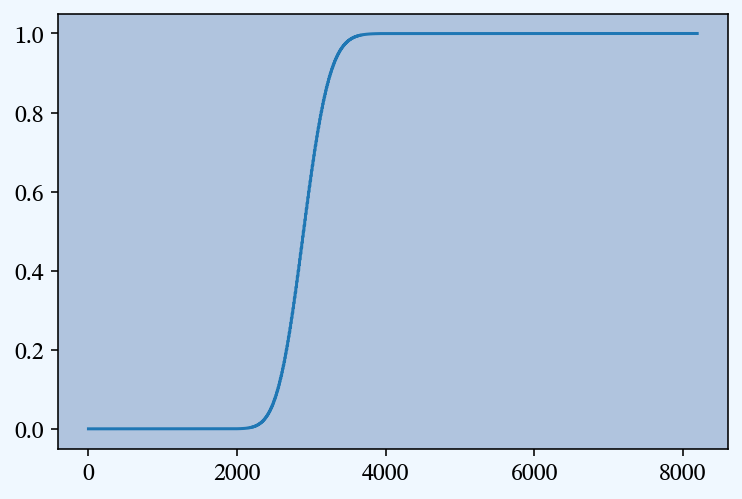

time: 109 ms (started: 2022-10-18 14:46:35 +01:00)


In [38]:
port0940.density_df.F.plot()

# Bahnemann Chapter 6: Limits and Deductibles 

In [76]:
## Example 4.1

time: 0 ns (started: 2022-10-22 22:44:05 +01:00)


In [84]:
a = build('agg Ex.4.1 dfreq[0 1 2][.6 .3 .1] dsev[1 2 3][.4 .5 .1]')
a

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,1.700,1.700,-111.022a,376.654m,376.654m,666.134a,365.675m
Freq,500.000m,,,1.342,,,993.808m
Agg,850.000m,850.000m,-555.112a,1.444,1.444,-666.134a,1.333


time: 31 ms (started: 2022-10-22 22:46:20 +01:00)


In [82]:
a.agg_m, a.agg_var

(0.85, 1.5054999999999996)

time: 0 ns (started: 2022-10-22 22:46:03 +01:00)


In [81]:
a.density_df.query('p_total > 0') [['p_total', 'F']]

,p_total,F
loss,,
0.000,600.000m,600.000m
1.000,120.000m,720.000m
2.000,166.000m,886.000m
3.000,70.000m,956.000m
4.000,33.000m,989.000m
5.000,10.000m,999.000m
6.000,1.000m,1.000


time: 16 ms (started: 2022-10-22 22:45:34 +01:00)


## Example 4.2

In [95]:
a = build('agg Ex.4.2 2.5 claims sev 4 * gamma 3 poisson', log2=16)
a

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,12.000,12.000,1.303n,577.350m,577.350m,-7.026n,1.155
Freq,2.500,,,632.456m,,,632.456m
Agg,30.000,30.000,-23.390n,730.297m,730.297m,-135.664n,912.871m


time: 187 ms (started: 2022-10-22 22:50:50 +01:00)


In [96]:
a.agg_m, a.agg_var

(29.99999996091965, 480.00000361452885)

time: 0 ns (started: 2022-10-22 22:50:53 +01:00)


In [102]:
a.density_df.loc[sorted(np.hstack((5, np.arange(0, 100.5, 10)))), 
                        ['F']].style.format(lambda x: f'{x:.4g}')

,F
loss,
0.0,0.08208
5.0,0.1096
10.0,0.1868
20.0,0.3756
30.0,0.5613
40.0,0.7152
50.0,0.8273
60.0,0.9014
70.0,0.9465


time: 0 ns (started: 2022-10-22 22:52:04 +01:00)


# Example 6.3

![Picture](img/Bahnemann_6_3.png) 

In [1]:
from aggregate import build

time: 671 ms (started: 2022-10-22 22:25:39 +01:00)


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


In [2]:
np.exp(7 + 2.4**2/2) 

19535.722662065487

time: 0 ns (started: 2022-10-22 22:25:40 +01:00)


In [20]:
(1<<16) * 12.5

819200.0

time: 0 ns (started: 2022-10-22 22:28:23 +01:00)


In [ ]:
# parsing problem....getting a sev_b?! 

In [75]:
np.exp(2.4**2)

317.34832891785044

time: 16 ms (started: 2022-10-22 22:43:25 +01:00)


In [105]:
# need up to 5M and need a reasonably small bs, say 50
# hence neeed log2 ge
np.ceil(np.log(5e6 / 50) / np.log(2))

17.0

time: 0 ns (started: 2022-10-23 09:54:22 +01:00)


In [114]:
# actual mean
np.exp(7+2.4**2/2), np.exp(7)

(19535.722662065487, 1096.6331584284585)

time: 0 ns (started: 2022-10-23 09:57:11 +01:00)


time: 0 ns (started: 2022-10-23 10:23:00 +01:00)


In [21]:
a.density_df.loc[[1e5, 2e5, 3e5, 4e5, 5e5, 7.5e5, 1e6, 2e6, 3e6, 4e6, 5e6], 'lev']  

loss
100000    1128.67539
200000    1128.67539
300000    1128.67539
400000    1128.67539
500000    1128.67539
750000    1128.67539
1000000   1128.67539
2000000   1128.67539
3000000   1128.67539
4000000   1128.67539
5000000   1128.67539
Name: lev, dtype: float64

time: 0 ns (started: 2022-10-23 11:29:00 +01:00)


In [24]:
self = a
adj_xs = np.hstack((self.xs - self.bs / 2, self.xs[-1] + self.bs / 2))
adj_xs

[autoreload of aggregate.distributions failed: Traceback (most recent call last):
  File "C:\Users\steve\miniconda3\envs\smve38\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\steve\miniconda3\envs\smve38\lib\site-packages\IPython\extensions\autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "C:\Users\steve\miniconda3\envs\smve38\lib\site-packages\IPython\extensions\autoreload.py", line 347, in update_generic
    update(a, b)
  File "C:\Users\steve\miniconda3\envs\smve38\lib\site-packages\IPython\extensions\autoreload.py", line 317, in update_class
    update_instances(old, new)
  File "C:\Users\steve\miniconda3\envs\smve38\lib\site-packages\IPython\extensions\autoreload.py", line 280, in update_instances
    ref.__class__ = new
TypeError: __class__ assignment: 'Aggregate' object layout differs from 'Aggregate'
]


array([       -25,         25,         75,        125,        175,        225,        275,        325,        375,        425,        475,        525,        575,        625,        675,        725,
              775,        825,        875,        925,        975,       1025,       1075,       1125,       1175,       1225,       1275,       1325,       1375,       1425, ...,  6.5521e+06,
        6.5522e+06,  6.5522e+06,  6.5523e+06,  6.5523e+06,  6.5524e+06,  6.5524e+06,  6.5525e+06,  6.5525e+06,  6.5526e+06,  6.5526e+06,  6.5527e+06,  6.5527e+06,  6.5528e+06,  6.5528e+06,
        6.5529e+06,  6.5529e+06,  6.553e+06,  6.553e+06,  6.5531e+06,  6.5531e+06,  6.5532e+06,  6.5532e+06,  6.5533e+06,  6.5533e+06,  6.5534e+06,  6.5534e+06,  6.5535e+06,  6.5535e+06,  6.5536e+06])

time: 0 ns (started: 2022-10-23 10:36:31 +01:00)


In [1]:
from aggregate import build
fg = lambda x: f'{x:.9g}'
welcome(fg)
import scipy.stats as ss

time: 750 ms (started: 2022-10-24 04:11:34 +01:00)


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


In [2]:
fz = ss.lognorm(0.24, scale=np.exp(7))
fz.sf(50),  fg(0 + 1*(fz.cdf(100) -  fz.cdf(50)))

(1.0, '9.46939313e-24')

time: 16 ms (started: 2022-10-24 04:11:35 +01:00)


In [7]:
# survival
a.density_df.loc[[1e5, 2e5, 3e5, 4e5, 5e5, 7.5e5, 1e6, 2e6, 3e6, 4e6, 5e6], 'lev']  

loss
100000    8895.75195
200000    10991.3936
300000    12192.7608
400000    13013.6097
500000    13625.3079
750000    14667.6836
1000000   15344.9327
2000000   16737.6129
3000000    17389.918
4000000   17781.9673
5000000    18047.687
Name: lev, dtype: float64

time: 0 ns (started: 2022-10-23 11:53:30 +01:00)


In [17]:
a.bs

50.0

time: 0 ns (started: 2022-10-24 04:09:46 +01:00)


In [11]:
# distr
a.density_df.loc[[1e5, 2e5, 3e5, 4e5, 5e5, 7.5e5, 1e6, 2e6, 3e6, 4e6, 5e6], 'lev']  

loss
100000    8895.75195
200000    10991.3936
300000    12192.7608
400000    13013.6097
500000    13625.3079
750000    14667.6836
1000000   15344.9327
2000000   16737.6129
3000000    17389.918
4000000   17781.9673
5000000    18047.687
Name: lev, dtype: float64

time: 16 ms (started: 2022-10-23 11:54:01 +01:00)


In [11]:
a.density_df.loc[[100000]].T

loss,100000
loss,100000
p,1.41862879e-05
p_total,1.41862879e-05
p_sev,1.41862879e-05
log_p,-11.1632347
log_p_sev,-11.1632347
F,0.96997932
F_sev,0.96997932
S,0.0300206801
S_sev,0.0300206801


time: 16 ms (started: 2022-10-24 04:14:58 +01:00)


In [3]:
build.logger_level(30)

time: 0 ns (started: 2022-10-23 11:51:31 +01:00)


In [5]:
np.sum(a.en)==1 and  a.freq_name=='fixed'

True

time: 16 ms (started: 2022-10-23 11:50:52 +01:00)


In [16]:
a.spec

{'name': 'B.Ex.6.3',
 'exp_el': 0,
 'exp_premium': 0,
 'exp_lr': 0,
 'exp_en': 1.0,
 'exp_attachment': 0,
 'exp_limit': inf,
 'sev_name': 'lognorm',
 'sev_a': 2.4,
 'sev_b': 10000.0,
 'sev_mean': 0,
 'sev_cv': 0,
 'sev_loc': 0,
 'sev_scale': 1096.6331584284585,
 'sev_xs': None,
 'sev_ps': None,
 'sev_wt': 1,
 'sev_conditional': True,
 'occ_reins': None,
 'occ_kind': '',
 'freq_name': 'fixed',
 'freq_a': 0,
 'freq_b': 0,
 'freq_zm': False,
 'freq_p0': nan,
 'agg_reins': None,
 'agg_kind': '',
 'note': ''}

time: 0 ns (started: 2022-10-24 04:15:56 +01:00)


In [15]:
a = build('agg B.Ex.6.3 1 claim '
          'sev exp(7) * lognorm 2.4 + 10000'
          # 'sev exp(11.5) * lognorm 0.24 '
          'fixed', bs=50, log2=17, normalize=False, # false is critical to getting the right accuracy 
        discretization_calc='both')
         # sev_calc='continuous')
# print(a.spec)
# display(a)
(a.agg_m, 
 ((1-a.density_df.F).cumsum() * a.bs).loc[100000] - 25 * (1 - a.density_df.F[100000]), 
 25 * (1 - a.density_df.F[100000]))

15:52.922|2802|Level 31  | aggregate.distributions, __init__|  creating with sev_scale=1096.6331584284585 and sev_loc=0
15:53.223|3076|WARNING   | aggregate.distributions, safe_integrate|  Severity.moms | ansr=inf, message no message ->
15:53.224|3081|WARNING   | aggregate.distributions, safe_integrate|  Severity.moms | splitting lognorm EX^2 integral for convergence reasons
15:53.747|3087|WARNING   | aggregate.distributions, safe_integrate|  Severity.moms | [ϵ, 0.01] split EX^2 integral returned The maximum number of subdivisions (100) has been achieved.   If increasing the limit yields no improvement it is advised to analyze    the integrand in order to determine the difficulties.  If the position of a    local difficulty can be determined (singularity, discontinuity) one will    probably gain from splitting up the interval and calling the integrator    on the subranges.  Perhaps a special-purpose integrator should be used.
15:53.828|3076|WARNING   | aggregate.distributions, safe_int

(19535.7227427439, 8896.502468098757, 0.7505170013376333)

time: 1.84 s (started: 2022-10-24 04:15:52 +01:00)


In [4]:
bit = a.density_df.loc[[0, a.bs, 2*a.bs, 1e5, 5e5,1e6], ['p_total', 'p_sev', 
                                                         'F_sev', 'F', 'S', 'lev']]
bit['S`'] = 1 - bit.F
bit['err'] = bit['S`'] / bit.S - 1
bit[['p_total', 'p_sev', 
     'F_sev', 'F', 'S', 'S`', 'err', 'lev']]

,p_total,p_sev,F_sev,F,S,S`,err,lev
loss,,,,,,,,
0,0,0,0,0,1,1,-1.44551038e-13,0
50,0,0,0,0,1,1,-1.44551038e-13,50
100,0,0,0,0,1,1,-1.44551038e-13,100
100000,0.00082992516,0.00082992516,0.521889994,0.521889994,0.478110006,0.478110006,-3.15525384e-13,91151.0051
500000,1.98729921e-14,1.98729921e-14,1,1,6.86856543e-12,6.75148826e-12,-0.0170453596,101600.12
1000000,0,0,1,1,0,-1.13464793e-13,-inf,101600.12


time: 31 ms (started: 2022-10-24 04:11:46 +01:00)


In [3]:
bit = a.density_df.loc[[0, a.bs, 2*a.bs, 1e5, 5e5,1e6], ['p_total', 'p_sev', 'F', 'S', 'lev']]
bit['S`'] = 1 - bit.F
bit['err'] = bit['S`'] / bit.S - 1
bit[['p_total', 'p_sev', 'F', 'S', 'S`', 'err', 'lev']]

,p_total,p_sev,F,S,S`,err,lev
loss,,,,,,,
0.000000000,0.057574183,0.057574183,0.057574183,0.942425817,0.942425817,0.000000000,0.000000000
50.000000000,0.074270551,0.074270551,0.131844733,0.868155267,0.868155267,0.000000000,47.121290864
100.000000000,0.050922589,0.050922589,0.182767323,0.817232677,0.817232677,0.000000000,90.529054200
100000.000000000,0.000014186,0.000014186,0.969979320,0.030020680,0.030020680,0.000000000,8895.751951098
500000.000000000,0.000000642,0.000000642,0.994629370,0.005370630,0.005370630,0.000000000,13625.307904377
1000000.000000000,0.000000147,0.000000147,0.997742955,0.002257045,0.002257045,0.000000000,15344.932714723


time: 31 ms (started: 2022-10-23 11:18:52 +01:00)


In [23]:
bit = a.density_df.loc[[0, a.bs, 2*a.bs, 1e5, 5e5,1e6], ['p_total', 'p_sev', 'F', 'S', 'lev']]
bit['S`'] = 1 - bit.F
bit['err'] = bit['S`'] / bit.S - 1
bit[['p_total', 'p_sev', 'F', 'S', 'S`', 'err', 'lev']]

,p_total,p_sev,F,S,S`,err,lev
loss,,,,,,,
0.000000000,0.057574183,0.057574183,0.057574183,0.942280290,0.942425817,0.000154442,0.000000000
50.000000000,0.074270551,0.074270551,0.131844733,0.868009739,0.868155267,0.000167657,47.114014486
100.000000000,0.050922589,0.050922589,0.182767323,0.817087150,0.817232677,0.000178105,90.514501445
100000.000000000,0.000014186,0.000014186,0.969979320,0.029875153,0.030020680,0.004871190,8881.199196100
500000.000000000,0.000000642,0.000000642,0.994629370,0.005225103,0.005370630,0.027851614,13552.544129389
1000000.000000000,0.000000147,0.000000147,0.997742955,0.002111518,0.002257045,0.068920822,15199.405164747


time: 16 ms (started: 2022-10-23 10:26:14 +01:00)


In [59]:
a.density_df.loc[[1e5, 5e5, 7.5e5, 1e6, 2e6, 3e6, 4e6, 5e6]]  .T

loss,100.000k,500.000k,750.000k,1.000M,2.000M,3.000M,4.000M,5.000M
loss,100.000k,500.000k,750.000k,1.000M,2.000M,3.000M,4.000M,5.000M
p,283.732u,12.842u,5.485u,2.948u,622.576n,241.187n,120.957n,70.122n
p_total,283.732u,12.842u,5.485u,2.948u,622.576n,241.187n,120.957n,70.122n
p_sev,283.732u,12.842u,5.485u,2.948u,622.576n,241.187n,120.957n,70.122n
log_p,-8.167,-11.263,-12.113,-12.734,-14.289,-15.238,-15.928,-16.473
log_p_sev,-8.167,-11.263,-12.113,-12.734,-14.289,-15.238,-15.928,-16.473
F,970.116m,994.638m,996.740m,997.747m,999.124m,999.515m,999.686m,999.779m
F_sev,970.116m,994.638m,996.740m,997.747m,999.124m,999.515m,999.686m,999.779m
S,29.884m,5.362m,3.260m,2.253m,875.578u,485.243u,313.733u,221.389u
S_sev,29.884m,5.362m,3.260m,2.253m,875.578u,485.243u,313.733u,221.389u


time: 31 ms (started: 2022-10-22 22:37:15 +01:00)


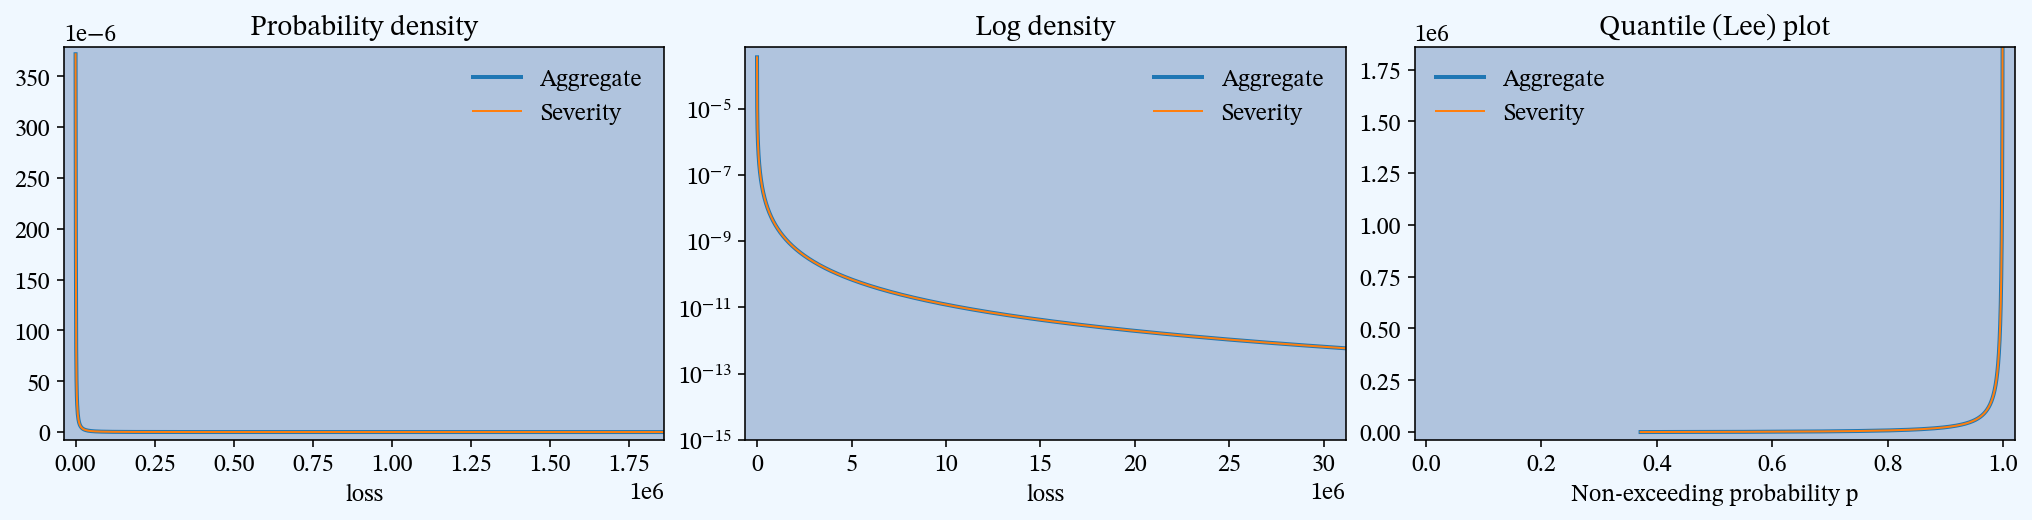

time: 3.16 s (started: 2022-10-22 22:35:00 +01:00)


In [52]:
a.plot()